In [1]:
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
!pip install spacy
import spacy
!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

import numpy as np
import pandas as pd
import re
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Keo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Keo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Keo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


     ---------------------------------------- 12.8/12.8 MB 4.7 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
df = pd.read_csv("C:/Users/Keo/Downloads/Spam.txt", delimiter="\t")
df.head()

,valid,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
0,valid,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,valid,U dun say so early hor... U c already then say...
3,valid,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [3]:
df.columns

Index(['valid', 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'], dtype='object')

In [4]:
#Renaming columns
df.columns = ['label', 'text']
df.head()

,label,text
0,valid,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,valid,U dun say so early hor... U c already then say...
3,valid,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [5]:
len(df)

5571

In [6]:
# Find average number of tokens in all sentences
avg_words_len=round(sum([len(i.split()) for i in df['text']])/len(df['text']))
print(avg_words_len)

16


In [7]:
# Finding Total no of unique words in corpus
s = set()
for sent in df['text']:
  for word in sent.split():
    s.add(word)
total_words_length=len(s)
print(total_words_length)


15685


In [8]:
# check for null values
df.isnull().sum()

label    0
text     0
dtype: int64

In [9]:
label_counts = df['label'].value_counts()
print(label_counts)

valid    4824
spam      747
Name: label, dtype: int64


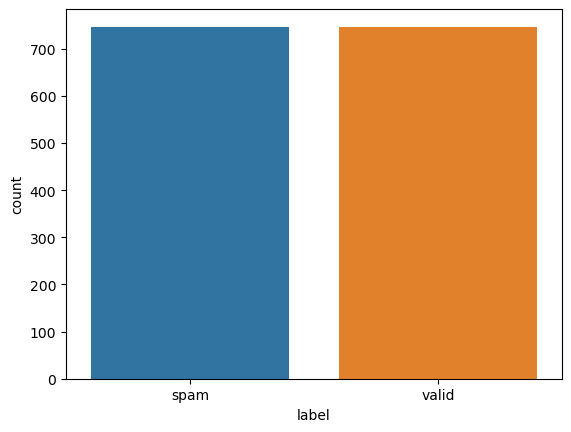

In [10]:
class1 = df['label'].value_counts().min()

# Downsample majority class
downsampled_df = (df.groupby('label')
                    .apply(lambda x: x.sample(n=class1, random_state=42))
                    .reset_index(drop=True))

# Countplot after down sampling
sns.countplot(x='label', data=downsampled_df)
plt.show()

In [11]:
#preprocessing

In [12]:
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df.head()

,label,text
0,valid,ok lar... joking wif u oni...
1,spam,free entry in 2 a wkly comp to win fa cup fina...
2,valid,u dun say so early hor... u c already then say...
3,valid,"nah i don't think he goes to usf, he lives aro..."
4,spam,freemsg hey there darling it's been 3 week's n...


In [13]:
#removing special characters, numbers and whitespaces
df['text'] = df['text'].str.replace(r"[^\w\s]", "", regex=True)
df['text'] = df['text'].str.replace(r"\d+", "", regex=True) 
df['text'] = df['text'].str.replace(r"\s+", " ", regex=True).str.strip()
df.head()

,label,text
0,valid,ok lar joking wif u oni
1,spam,free entry in a wkly comp to win fa cup final ...
2,valid,u dun say so early hor u c already then say
3,valid,nah i dont think he goes to usf he lives aroun...
4,spam,freemsg hey there darling its been weeks now a...


In [14]:
# Spelling correction
#df['text'] = df['text'].map(lambda x: str(TextBlob(x).correct()) if isinstance(x, str) and x.strip() else x)
#df.head()

In [15]:
#removing stop words
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join([word for word in x.split() if word not in stop]))
df.head()

,label,text
0,valid,ok lar joking wif u oni
1,spam,free entry wkly comp win fa cup final tkts st ...
2,valid,u dun say early hor u c already say
3,valid,nah dont think goes usf lives around though
4,spam,freemsg hey darling weeks word back id like fu...


In [16]:
#lemmatization
def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

df.sample(n=5) 

,label,text
2787,valid,forgot takes years shower sorry atyour phone d...
390,valid,huh late fr dinner
584,valid,hows scotland hope showing jjc tendencies take...
342,valid,u hiding stranger
227,valid,hey company elama po mudyadhu


In [17]:
# Function to tokenize text
def tokenize_and_vectorize(text):
    doc = nlp(text)
    return [token.text for token in doc]

df['text'] = df['text'].apply(tokenize_and_vectorize)
df.head()

,label,text
0,valid,"[ok, lar, joking, wif, u, oni]"
1,spam,"[free, entry, wkly, comp, win, fa, cup, final,..."
2,valid,"[u, dun, say, early, hor, u, c, already, say]"
3,valid,"[nah, do, nt, think, goes, usf, lives, around,..."
4,spam,"[freemsg, hey, darling, weeks, word, back, i, ..."


In [18]:
cleaned_data = df 

# Save the Data to a CSV file
cleaned_data.to_csv('clean_spam_texts.csv', index=False)
print("Cleaned data successful!")

Cleaned data successful!
